In [1]:
import pandas as pd

In [32]:
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,brand,km_driven,fuel,owner,purchased
0,Maruti,145500,Diesel,First Owner,No
1,Skoda,120000,Diesel,Second Owner,No
2,Honda,140000,Petrol,Third Owner,No
3,Hyundai,127000,Diesel,First Owner,No
4,Maruti,120000,Petrol,First Owner,No


<Axes: xlabel='km_driven', ylabel='Density'>

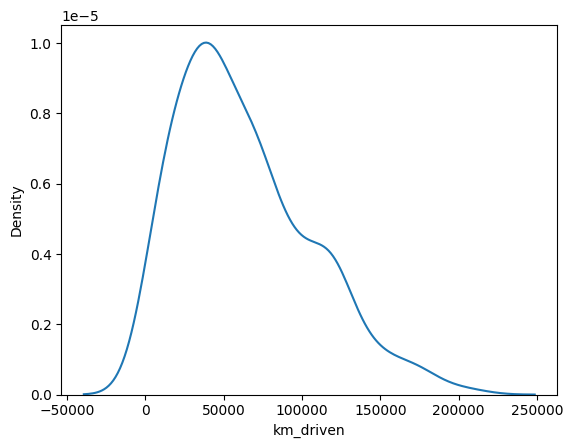

In [5]:
import seaborn as sns
sns.kdeplot(df['km_driven'])

<Axes: ylabel='km_driven'>

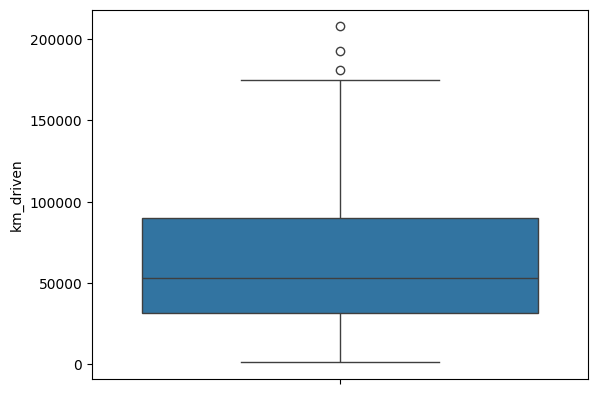

In [6]:
sns.boxplot(df['km_driven'])

# Triming

In [9]:
upper_limit = df['km_driven'].mean() + 3 * df['km_driven'].std()
lower_limit = df['km_driven'].mean() - 3 * df['km_driven'].std()

In [10]:
upper_limit , lower_limit

(190269.8072583956, -64099.27883030196)

In [12]:
df.shape

(299, 5)

<Axes: ylabel='new_feature'>

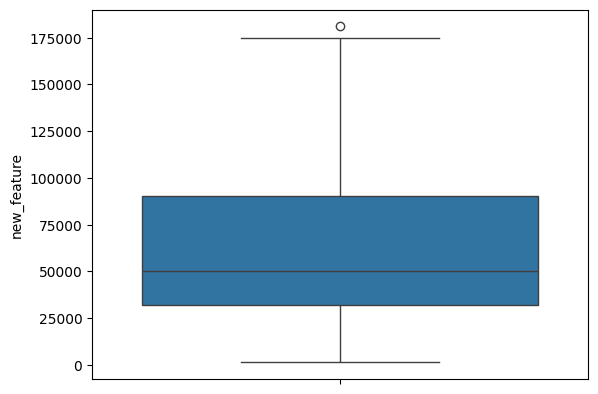

In [17]:
df['new_feature'] = df['km_driven'] [ (lower_limit < df['km_driven']) & (df['km_driven'] < upper_limit ) ]
sns.boxplot(df['new_feature'])

<Axes: xlabel='new_feature', ylabel='Density'>

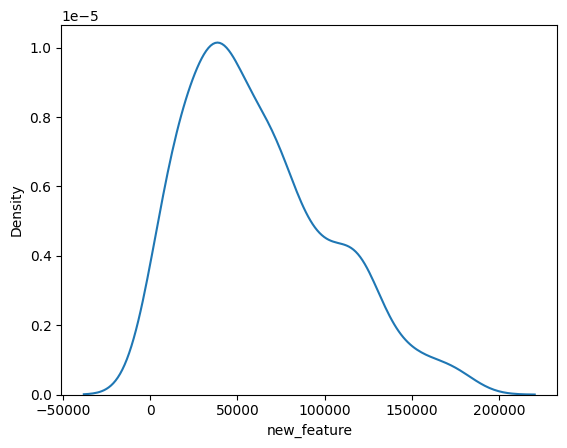

In [16]:
sns.kdeplot(df['new_feature'])

# Capping

In [18]:
upper_limit , lower_limit

(190269.8072583956, -64099.27883030196)

In [20]:
df['km_driven'].describe()

count       299.000000
mean      63085.264214
std       42394.847681
min        1303.000000
25%       31900.000000
50%       53000.000000
75%       90000.000000
max      207890.000000
Name: km_driven, dtype: float64

In [33]:
# for right outliers
outlier_indexes = list(df['km_driven'] [ df['km_driven'] > upper_limit].index)
df['km_driven'].iloc[outlier_indexes] = upper_limit
outlier_indexes

[272, 287]

In [34]:
# df['km_driven'].iloc[[272,287]] = upper_limit
df['km_driven'].iloc[outlier_indexes] = upper_limit

# np.where(condition , value_if_true , value_if_false)

# for both side outliers
np.where (df['km_driven'] > upper_limit , upper_limit , np.where(df['km_driven'] < lower_limit , lower_limit , df['km_driven']))

C:\Users\Manish\AppData\Local\Temp\ipykernel_1900\2343258429.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['km_driven'].iloc[outlier_indexes] = upper_limit
C:\Users\Manish\AppData\Local\Temp\ipykernel_1900\2343258429.py:2: SettingWi

In [35]:
df['km_driven'].describe()

count       299.000000
mean      63017.202724
std       42176.779911
min        1303.000000
25%       31900.000000
50%       53000.000000
75%       90000.000000
max      190269.807258
Name: km_driven, dtype: float64